In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.2.2+cu121'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [3]:
y = weight * X + bias

In [4]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

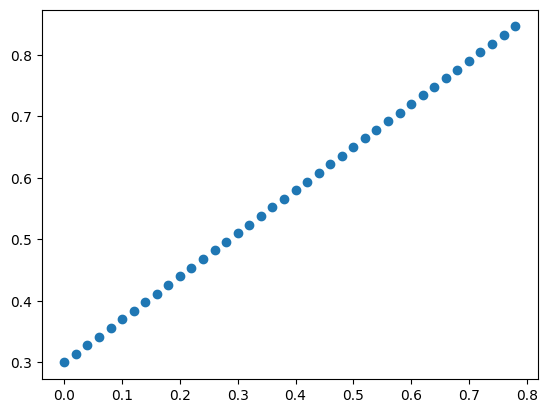

In [6]:
plt.scatter(X_train.squeeze(), y_train.squeeze())

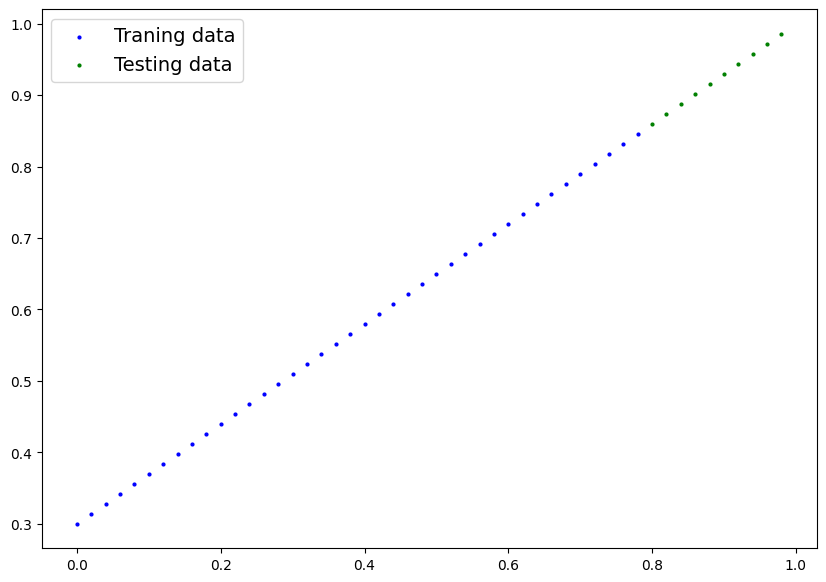

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))  

    plt.scatter(train_data, train_labels, c="b", s=4, label="Traning data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt .scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})


plot_predictions()

In [91]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
         
    def forward(self, x:torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias


In [92]:
torch.manual_seed(42)

# Model Instane
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [93]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [94]:
y_preds = model_0(X_test)
y_preds

tensor([[3.0325],
        [3.0589],
        [3.0854],
        [3.1119],
        [3.1383],
        [3.1648],
        [3.1913],
        [3.2177],
        [3.2442],
        [3.2707],
        [3.2971],
        [3.3236],
        [3.3501],
        [3.3765],
        [3.4030],
        [3.4295],
        [3.4559],
        [3.4824],
        [3.5089],
        [3.5353]], grad_fn=<AddBackward0>)

In [95]:
# Make predictions

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[3.0325],
        [3.0589],
        [3.0854],
        [3.1119],
        [3.1383],
        [3.1648],
        [3.1913],
        [3.2177],
        [3.2442],
        [3.2707],
        [3.2971],
        [3.3236],
        [3.3501],
        [3.3765],
        [3.4030],
        [3.4295],
        [3.4559],
        [3.4824],
        [3.5089],
        [3.5353]])

In [96]:
y_test

tensor([[1.6200],
        [1.6290],
        [1.6380],
        [1.6470],
        [1.6560],
        [1.6650],
        [1.6740],
        [1.6830],
        [1.6920],
        [1.7010],
        [1.7100],
        [1.7190],
        [1.7280],
        [1.7370],
        [1.7460],
        [1.7550],
        [1.7640],
        [1.7730],
        [1.7820],
        [1.7910]])

ValueError: x and y must be the same size

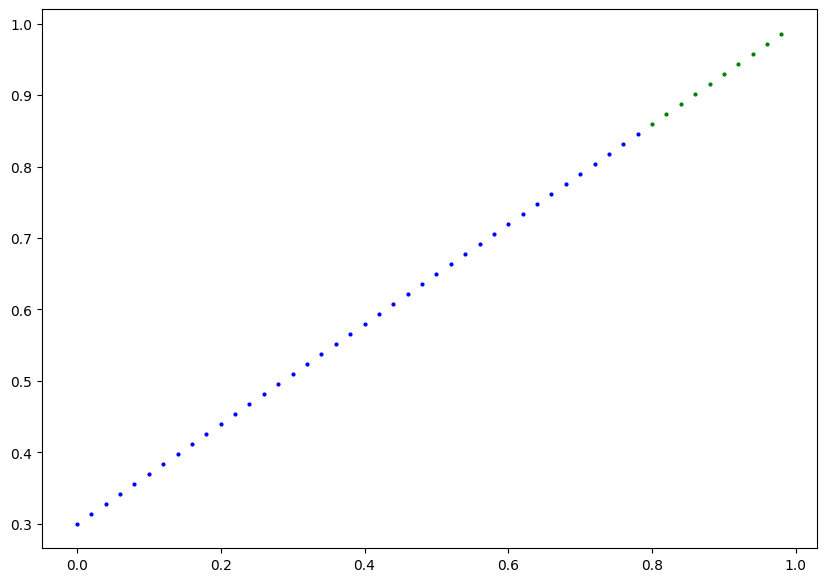

In [98]:
plot_predictions(predictions=y_preds.cpu())

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [17]:
### Building a training loop
epochs = 200


# Tracking experiment
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()  # mode in PyTorch

  y_pred = model_0(X_train)  # forward pass

  loss = loss_fn(y_pred, y_train)  

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()  # perform gradient descent       


  ### Testing
  model_0.eval() # turns off gradient tracking     
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f'Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}')



Epoch: 0 | Test: 0.6860889196395874 | Test loss: 0.7637526988983154
Epoch: 10 | Test: 0.5708791017532349 | Test loss: 0.6290428042411804
Epoch: 20 | Test: 0.45566922426223755 | Test loss: 0.4943329691886902
Epoch: 30 | Test: 0.34045934677124023 | Test loss: 0.35962313413619995
Epoch: 40 | Test: 0.2252494841814041 | Test loss: 0.2249133139848709
Epoch: 50 | Test: 0.1100396141409874 | Test loss: 0.09020347893238068
Epoch: 60 | Test: 0.009724985808134079 | Test loss: 0.020998019725084305
Epoch: 70 | Test: 0.006216754671186209 | Test loss: 0.014099234715104103
Epoch: 80 | Test: 0.002788322512060404 | Test loss: 0.005826681852340698
Epoch: 90 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 100 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 110 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 120 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 130 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973


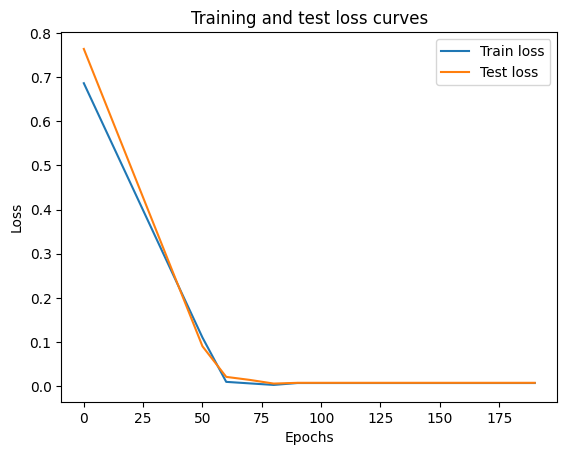

In [18]:
# Plot the loss curves

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [20]:
loss

tensor(0.0044, grad_fn=<MeanBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6977], requires_grad=True),
 Parameter containing:
 tensor([0.3080], requires_grad=True)]

In [23]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)


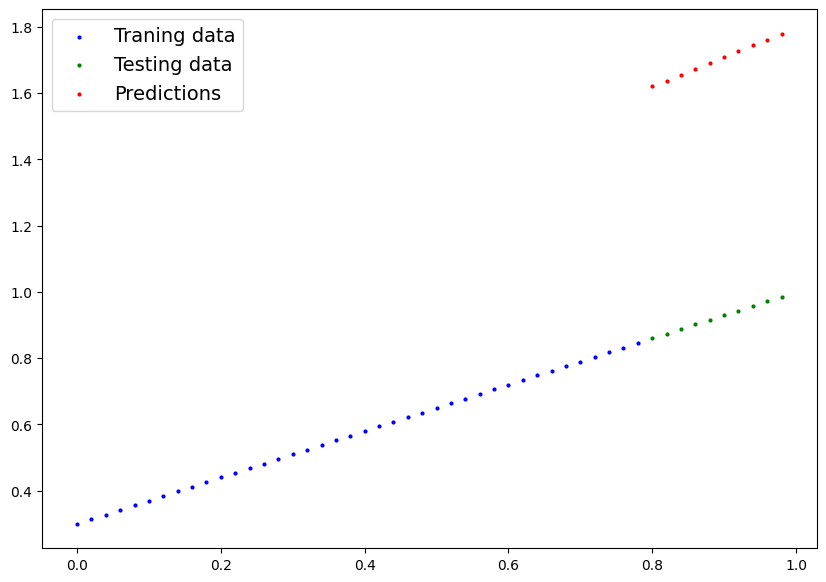

In [24]:
plot_predictions(predictions=y_preds)

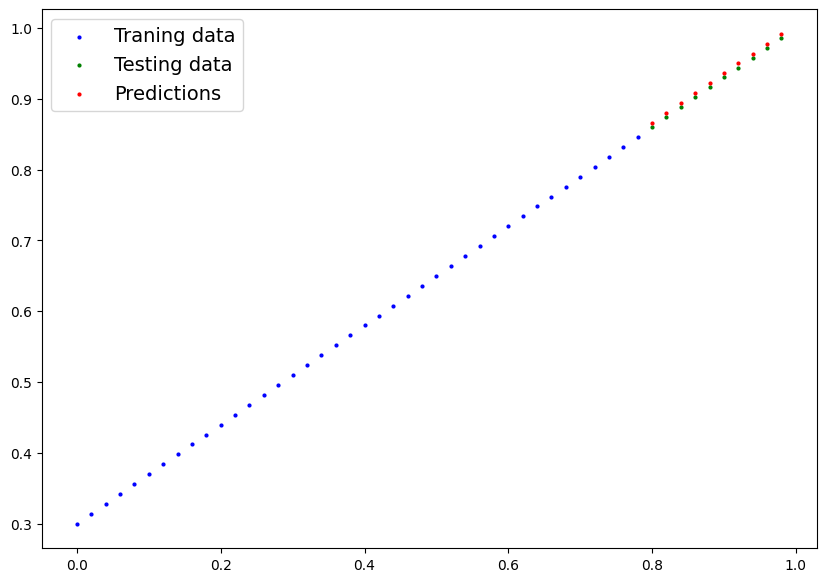

In [25]:
plot_predictions(predictions=y_pred_new)

In [26]:
weight, bias

(0.7, 0.3)

In [27]:
## Saving a model

In [28]:
# Saving and Loading models in PyTorch

In [29]:
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create models save path
MODEL_NAME = "Workflow_01_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), 
           f=MODEL_SAVE_PATH)




Saving model to: models/Workflow_01_model.pth


In [30]:
!ls -l models

razem 4
-rw-rw-r-- 1 oobx oobx 1556 mar 29 20:57 Workflow_01_model.pth


In [31]:
model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_0.eval()

model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [32]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [33]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [34]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [35]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [36]:
# Putting it all together

In [37]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [39]:
!nvidia-smi

Fri Mar 29 20:57:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GT 1030         Off | 00000000:01:00.0  On |                  N/A |
| N/A   38C    P0              N/A /  30W |    405MiB /  2048MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [40]:
weight = 0.1
bias = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]
# len(X_train), len(y_train), len(X_test), len(y_test)
X_train

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

In [41]:
y_test

tensor([[0.2800],
        [0.2820],
        [0.2840],
        [0.2860],
        [0.2880],
        [0.2900],
        [0.2920],
        [0.2940],
        [0.2960],
        [0.2980]])

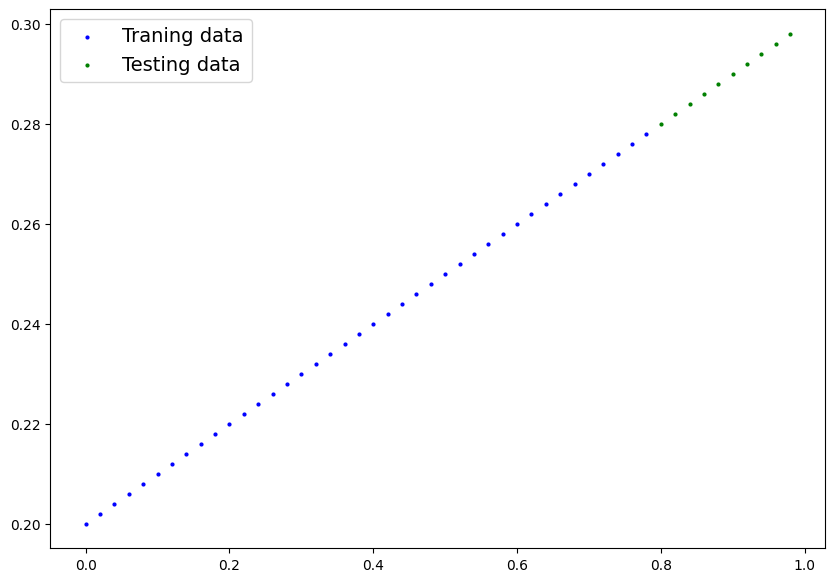

In [42]:
plot_predictions(X_train, y_train, X_test, y_test)

In [43]:
#creating a linear model by subclasing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegressionModelV2 ()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [44]:
next(model_1.parameters()).device

device(type='cpu')

In [45]:
model_1.to(device)
list(iter(next(model_1.parameters())))

[tensor([0.7645], device='cuda:0', grad_fn=<UnbindBackward0>)]

In [46]:
# Training
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

# Training loop
torch.manual_seed(42)

epochs = 200

# Tracking experiment
epoch_count = []
loss_values = []
test_loss_values = []

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  ## Printing out what's happening
  if epoch % 10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.8891779184341431 | Test loss: 1.2201001644134521
Epoch: 10 | Loss: 0.8776571154594421 | Test loss: 1.2066293954849243
Epoch: 20 | Loss: 0.8661362528800964 | Test loss: 1.193158507347107
Epoch: 30 | Loss: 0.8546153903007507 | Test loss: 1.179687738418579
Epoch: 40 | Loss: 0.843094527721405 | Test loss: 1.1662168502807617
Epoch: 50 | Loss: 0.8315736651420593 | Test loss: 1.1527460813522339
Epoch: 60 | Loss: 0.8200529217720032 | Test loss: 1.1392754316329956
Epoch: 70 | Loss: 0.8085319399833679 | Test loss: 1.1258044242858887
Epoch: 80 | Loss: 0.797011137008667 | Test loss: 1.1123336553573608
Epoch: 90 | Loss: 0.7854903340339661 | Test loss: 1.098862886428833
Epoch: 100 | Loss: 0.7739695310592651 | Test loss: 1.0853919982910156
Epoch: 110 | Loss: 0.7624486684799194 | Test loss: 1.0719212293624878
Epoch: 120 | Loss: 0.7509278059005737 | Test loss: 1.0584503412246704
Epoch: 130 | Loss: 0.7394070029258728 | Test loss: 1.0449795722961426
Epoch: 140 | Loss: 0.727886140346527

In [47]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [48]:
model_1.eval()


with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds


tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]], device='cuda:0')

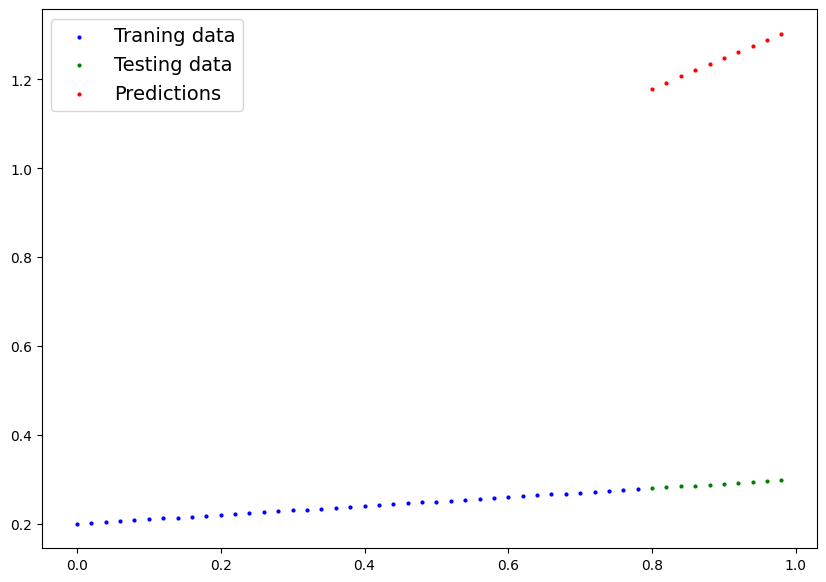

In [49]:
# plot_predictions(predictions=y_preds.cpu())

# y_preds = y_preds.cpu().data.numpy()
# y_preds = model_1.to(device)
# y_preds.device
plot_predictions(train_data=X_train.cpu(),
                  train_labels=y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                  predictions=y_preds.cpu())

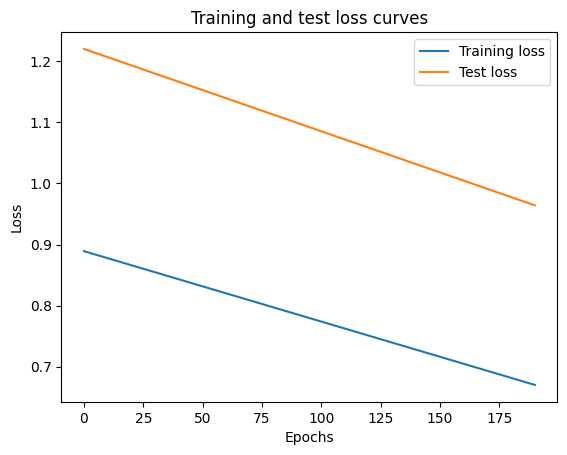

In [50]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training loss")     
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")     
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();       

In [51]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [52]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [53]:
# Load a PyTorch

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loadad model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [54]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [55]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [56]:
# Evaluated loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

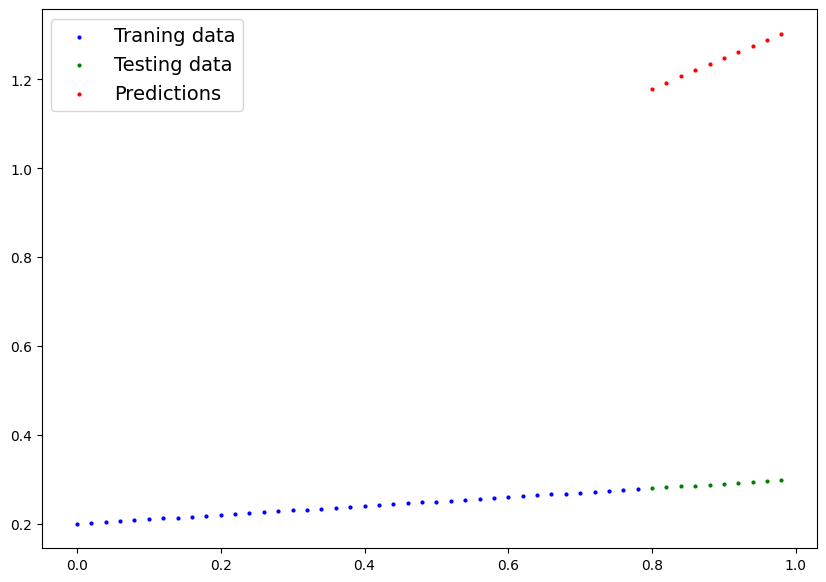

In [57]:
plot_predictions(train_data=X_train.cpu(),
                  train_labels=y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                  predictions=loaded_model_1_preds.cpu())

In [58]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]], device='cuda:0')

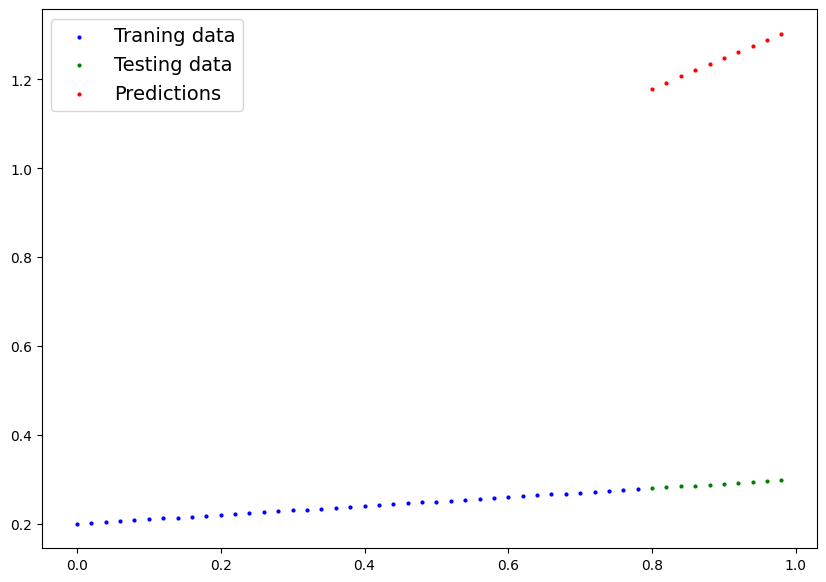

In [59]:
plot_predictions(train_data=X_train.cpu(),
                  train_labels=y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                  predictions=y_preds.cpu())

In [60]:
## Excercises, extra curriculum

In [61]:
weight = 0.3
bias = 0.9

start = 0
stop = 3
step = .03

data = torch.arange(start, stop, step).unsqueeze(dim=1)

X = data 
y = weight * data + bias

split = int(0.8 * len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# print(X_test, y_test)

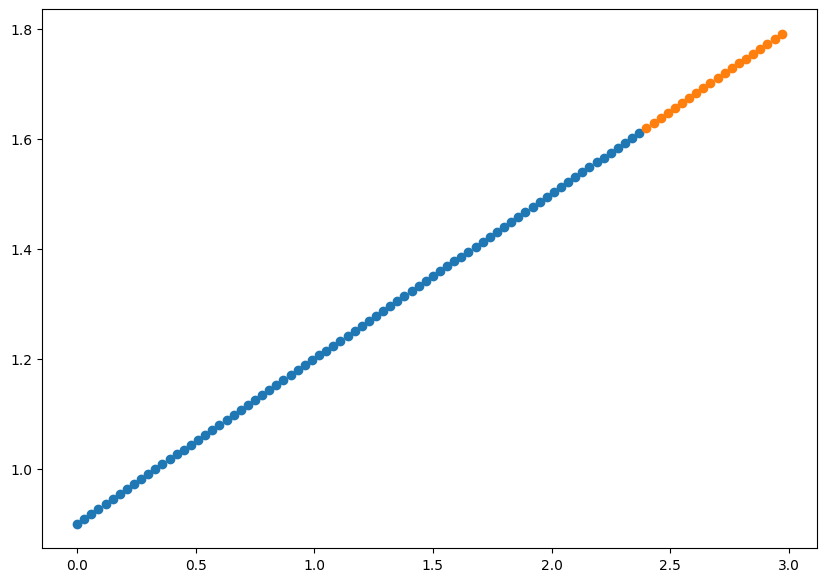

In [62]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
# plt.legend(prop={'size': 14})

In [63]:
class pyTorchExc1(nn.Module):
  def __init__(self):
    super().__init__()  ## must!@
    # self.weight = nn.Parameter(torch.rand(1, requires_grad=True, dtype=float))
    # self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=float))
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    # return self.weight * x + self.bias
    return self.linear_layer(x)


model_ex = pyTorchExc1()
model_ex.state_dict()


OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
             ('linear_layer.bias', tensor([0.9186]))])

In [64]:
# return X_train, y_train, X_test, y_test, y_test_pred

loss_fn = nn.L1Loss()
optim = torch.optim.SGD(model_ex.parameters(), lr=0.01)

epoch_arr = []
loss_arr = []
test_loss_arr = []

for epoch in range(100):

  model_ex.train()

  y_pred = model_ex.forward(X_train)

  loss = loss_fn(y_pred, y_train)

  optim.zero_grad()

  loss.backward()

  optim.step()

  model_1.eval()
  with torch.inference_mode():
    y_test_pred = model_ex.forward(X_test)

    loss_test = loss_fn(y_test_pred, y_test)

  if epoch % 20 == 0:
    epoch_arr.append(epoch) 
    loss_arr.append(loss)
    test_loss_arr.append(loss_test)

    print(f'epoch: {epoch} | loss: {loss} | test loss: {loss_test}')


epoch: 0 | loss: 0.6150314211845398 | test loss: 1.3746131658554077
epoch: 20 | loss: 0.23129239678382874 | test loss: 0.6117687225341797
epoch: 40 | loss: 0.09309054911136627 | test loss: 0.18847644329071045
epoch: 60 | loss: 0.0662926435470581 | test loss: 0.11473637819290161
epoch: 80 | loss: 0.041038744151592255 | test loss: 0.0698845237493515


In [65]:
len(X_test)

20

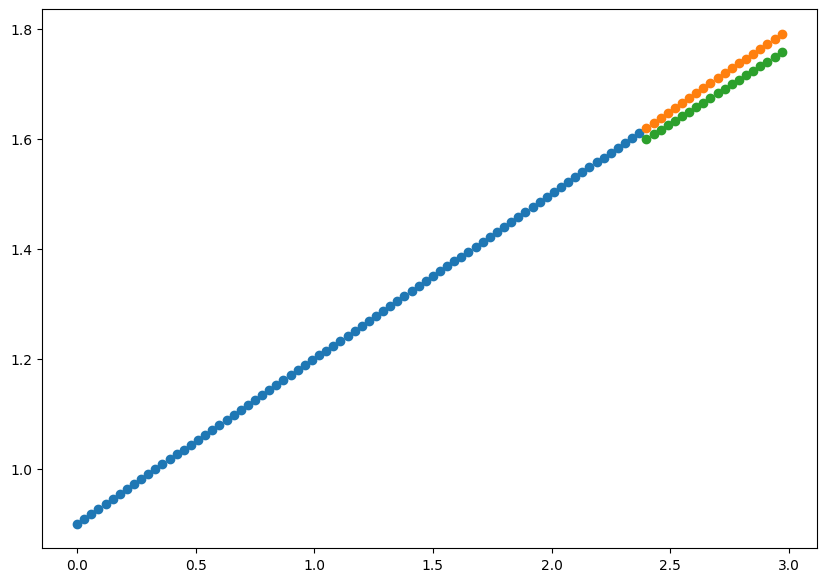

In [66]:
X_train

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred.detach())
# plt.legend(prop={'size': 14})

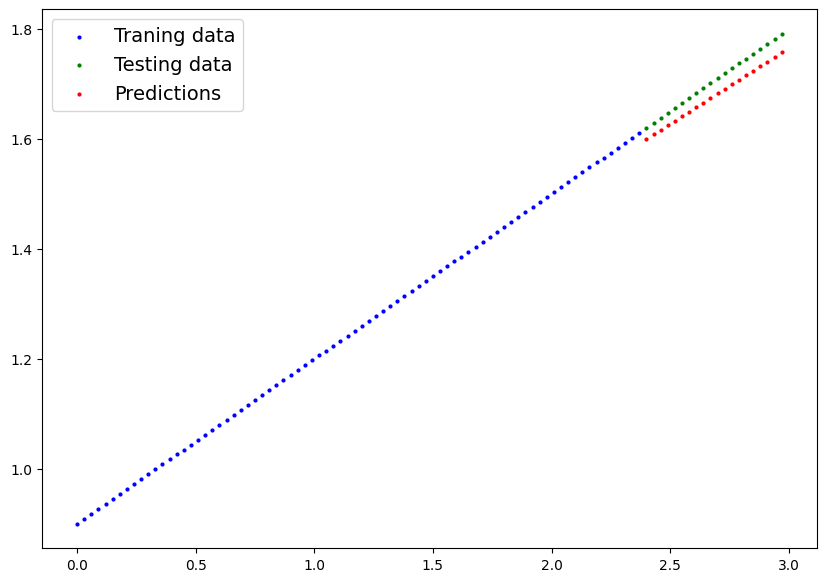

In [67]:
plot_predictions(train_data=X_train.cpu(),
                  train_labels=y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                  predictions=y_test_pred.cpu())

In [68]:
model_ex.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2760]])),
             ('linear_layer.bias', tensor([0.9374]))])

In [69]:
from pathlib import Path

MODEL_PATH = Path('my_models')
# MODEL_PATH = MODEL_PATH.mkdir(parents=True, exist_ok=True)
# MODEL_PATH = 'model'

MODEL_NAME = 'model_exer.pt'
MODEL_NAME_PATH = MODEL_PATH / MODEL_NAME

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_ex.state_dict(), f=MODEL_NAME_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


RuntimeError: Parent directory my_models does not exist.

In [ ]:
model_ex_loaded = pyTorchExc1()
model_ex_loaded.load_state_dict(torch.load(MODEL_NAME_PATH))

model_ex_loaded.state_dict()

In [ ]:
# X_train, y_train, X_test, y_test, y_test_pred = trainings(model_ex_loaded, 200, lr=0.01)

In [ ]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(model_ex_loaded.parameters(), lr=0.0001)

epoch_arr = []
loss_arr = []
test_loss_arr = []

for epoch in range(200):

  model_ex_loaded.train()

  y_pred = model_ex_loaded(X_train)

  loss = loss_fn(y_pred, y_train)

  optim.zero_grad()

  loss.backward()

  optim.step()

  model_1.eval()
  with torch.inference_mode():
    y_test_pred = model_ex_loaded(X_test)

    loss_test = loss_fn(y_test_pred, y_test)

  if epoch % 20 == 0:
    epoch_arr.append(epoch) 
    loss_arr.append(loss)
    test_loss_arr.append(loss_test)

    print(f'epoch: {epoch} | loss: {loss} | test loss: {loss_test}')

In [ ]:
model_ex_loaded.state_dict()

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred.detach())
# plt.legend(prop={'size': 14})

In [ ]:
next(loaded_model_1.parameters()).device